In [ ]:
import torch
import numpy as np
import torch.nn as nn
from PIL import Image
from torchvision import transforms
from torchvision.models import vit_b_16
import cv2
import matplotlib.pyplot as plt

In [ ]:
model = vit_b_16(pretrained=True)
model.eval()

In [ ]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

img = Image.open(path)
#img.resize((224, 224))
input = transform(img).unsqueeze(0)

In [3]:
image_path = 'img/random.jpg'

In [4]:
# Load pre-trained ViT model
model = torch.hub.load('facebookresearch/deit:main', 'deit_tiny_patch16_224', pretrained=True)
img = preprocess_image(image_path) # shape: batch=1, channels=3, 224x224

Downloading: "https://github.com/facebookresearch/deit/zipball/main" to C:\Users\Uporabnik/.cache\torch\hub\main.zip


ModuleNotFoundError: No module named 'timm'

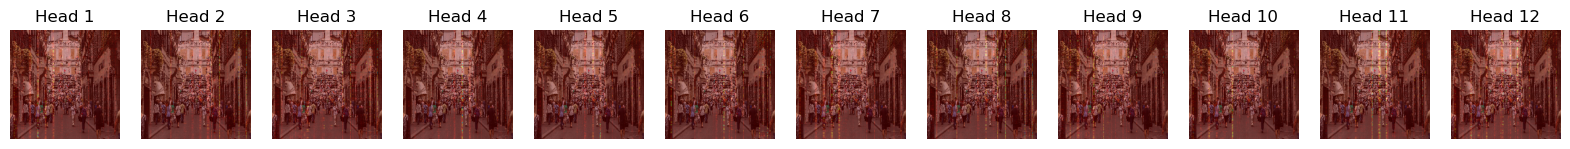

In [16]:
# Get the attention weights from the model
with torch.no_grad():
    outputs = model(img, output_attentions=True)
    attentions = outputs.attentions

# Function to plot attention maps for each head
def plot_attention_maps(attention_weights, image_resized):
    num_heads = attention_weights.shape[1]
    h, w, _ = image_resized.shape

    fig, axes = plt.subplots(1, num_heads, figsize=(20, 20))
    for i in range(num_heads):
        head_attention = attention_weights[0, i].cpu().numpy()  # Get the attention map for the i-th head
        rescaled_attention = cv2.resize(head_attention, (w, h))
        
        # Normalize attention weights to [0, 1]
        rescaled_attention = (rescaled_attention - rescaled_attention.min()) / (rescaled_attention.max() - rescaled_attention.min())
        
        # Create heatmap
        heatmap = cv2.applyColorMap(np.uint8(255 * rescaled_attention), cv2.COLORMAP_JET)
        
        # Superimpose heatmap on the original image
        superimposed_image = cv2.addWeighted(image_resized, 0.6, heatmap, 0.4, 0)
        
        axes[i].imshow(superimposed_image)
        axes[i].axis('off')
        axes[i].set_title(f'Head {i+1}')
    
    plt.show()

# Get the last layer's attention weights
last_layer_attention = attentions[-1]
image_resized = cv2.resize(np.array(Image.open(image_path)), (224, 224))

# Plot attention maps for each head
plot_attention_maps(last_layer_attention, image_resized)

In [14]:
heatmap.shape

(224, 224, 3)

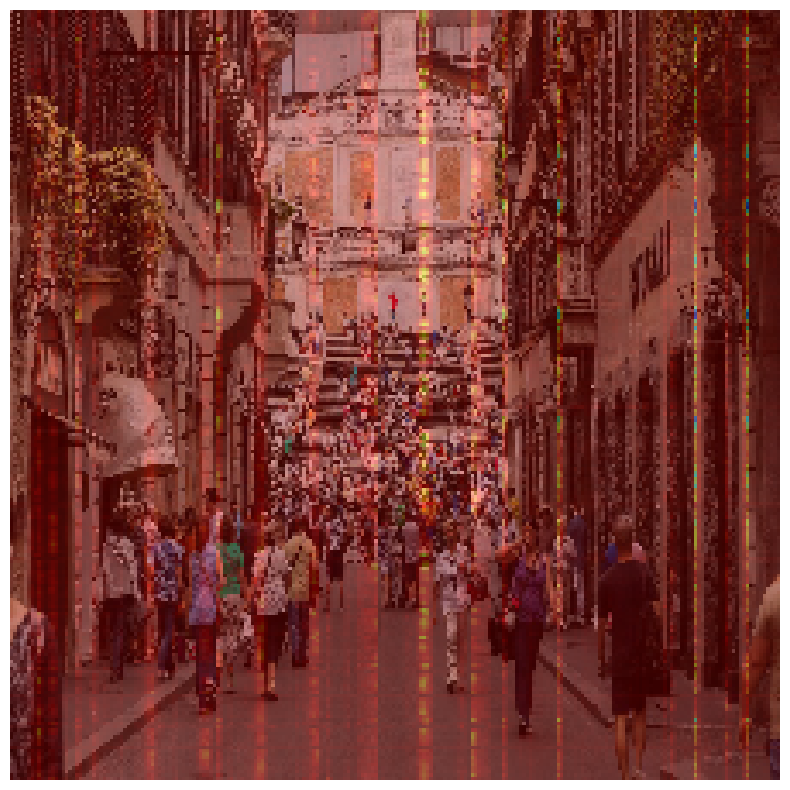

In [15]:
# Superimpose heatmap on the original image
superimposed_image = cv2.addWeighted(image_resized, 0.6, heatmap, 0.4, 0)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(superimposed_image)
plt.axis('off')
plt.show()

In [26]:
outputs.attentions[1].shape

torch.Size([1, 12, 197, 197])

In [17]:
model.config

ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "10": "brambling, Fringilla montifringilla",
    "11": "goldfinch, Carduelis carduelis",
    "12": "house finch, linnet, Carpodacus mexicanus",
    "13": "junco, snowbird",
    "14": "indigo bunting, indigo finch, indigo bird, Passerina cyanea",
    "15": "robin, American robin, Turdus migratorius",
    "16": "bulbul",
 

In [28]:
224*224/(16*16)

196.0